In [643]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [644]:
df = pd.read_csv('training.csv', delimiter="\t")
df.head()

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight
0,01/10/2016,2016,10,1,1145,MAN,SXF,MAN-SXF,91,3660,64016,175,61,440
1,01/10/2016,2016,10,1,1160,CTA,FCO,CTA-FCO,68,3280,66138,182,27,350
2,01/10/2016,2016,10,1,1183,LGW,SNN,LGW-SNN,64,2720,58447,127,(null),(null)
3,01/10/2016,2016,10,1,1220,ATH,CHQ,ATH-CHQ,35,1682,60587,163,12,150
4,01/10/2016,2016,10,1,1225,CHQ,ATH,CHQ-ATH,34,1877,63090,178,37,490


In [645]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29731 entries, 0 to 29730
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DepartureDate     29731 non-null  object
 1   DepartureYear     29731 non-null  int64 
 2   DepartureMonth    29731 non-null  int64 
 3   DepartureDay      29731 non-null  int64 
 4   FlightNumber      29731 non-null  int64 
 5   DepartureAirport  29731 non-null  object
 6   ArrivalAirport    29731 non-null  object
 7   Route             29731 non-null  object
 8   ActualFlightTime  29731 non-null  int64 
 9   ActualTotalFuel   29731 non-null  int64 
 10  ActualTOW         29731 non-null  object
 11  FLownPassengers   29731 non-null  object
 12  BagsCount         29731 non-null  object
 13  FlightBagsWeight  29731 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.2+ MB


In [646]:
df = df.rename({"FLownPassengers" : "FlownPassengers"}, axis = 1)

In [647]:
df['ActualTOW'] = df['ActualTOW'].replace('(null)', np.nan)

In [648]:
df['BagsCount'] = df['BagsCount'].replace('(null)', np.nan)

In [649]:
df['FlightBagsWeight'] = df['FlightBagsWeight'].replace('(null)', np.nan)

In [650]:
df['FlownPassengers'] = df['FlownPassengers'].replace('(null)', np.nan)

In [651]:
df = df.astype({'ActualTOW' : 'float', 'BagsCount' : 'float', 'FlightBagsWeight' : 'float', 'FlownPassengers' : 'float'})

In [652]:
df = df.dropna(subset=['ActualTOW'])

In [653]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df[['BagsCount', 'FlownPassengers']] = imp.fit_transform(df[['BagsCount', 'FlownPassengers']])
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['FlightBagsWeight'] = imp.fit_transform(df[['FlightBagsWeight']])

In [654]:
X = df.drop('ActualTOW', axis = 1)
y = df['ActualTOW']

In [655]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [656]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'DepartureYear'}>,
        <Axes: title={'center': 'DepartureMonth'}>,
        <Axes: title={'center': 'DepartureDay'}>],
       [<Axes: title={'center': 'FlightNumber'}>,
        <Axes: title={'center': 'ActualFlightTime'}>,
        <Axes: title={'center': 'ActualTotalFuel'}>],
       [<Axes: title={'center': 'FlownPassengers'}>,
        <Axes: title={'center': 'BagsCount'}>,
        <Axes: title={'center': 'FlightBagsWeight'}>],
       [<Axes: title={'center': 'ActualTOW'}>, <Axes: >, <Axes: >]],
      dtype=object)

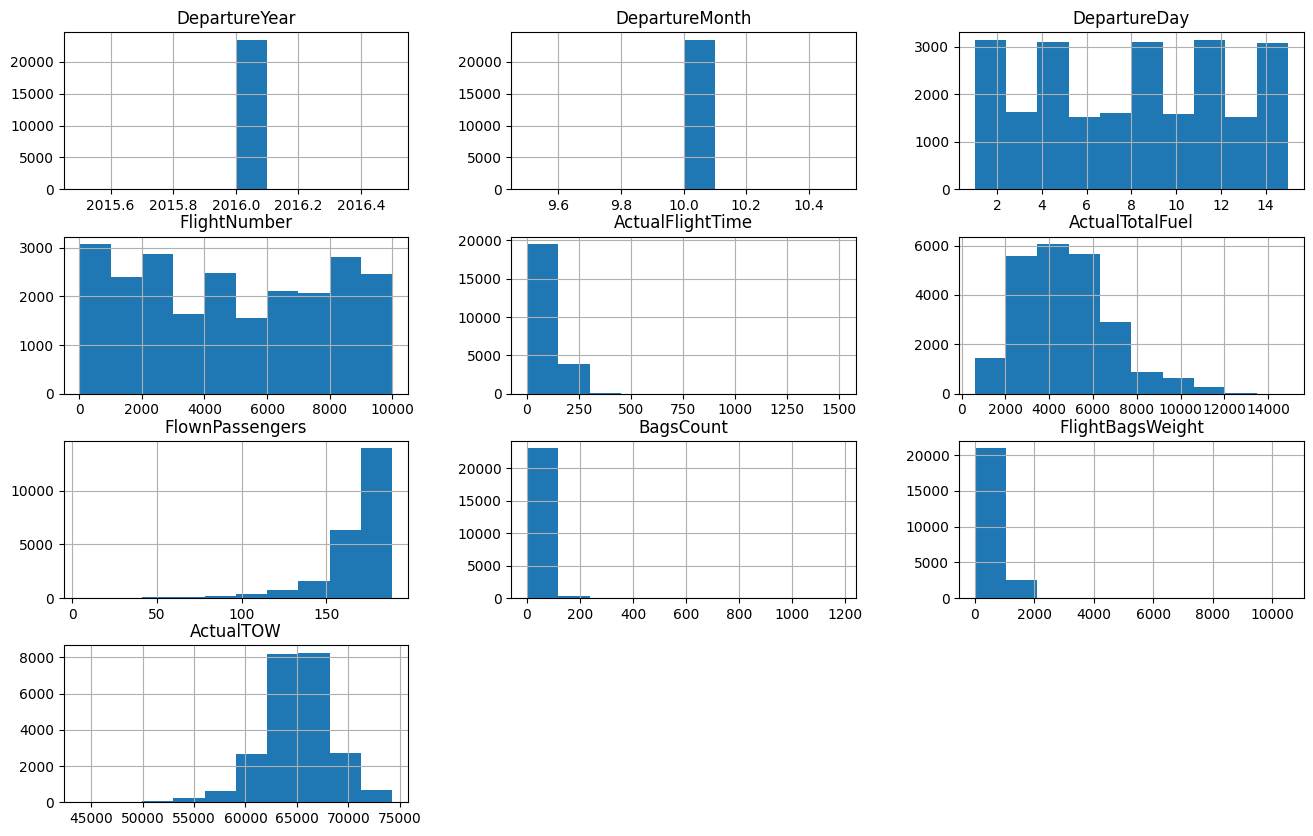

In [657]:
train_data.hist(figsize=(16,10))

<Axes: >

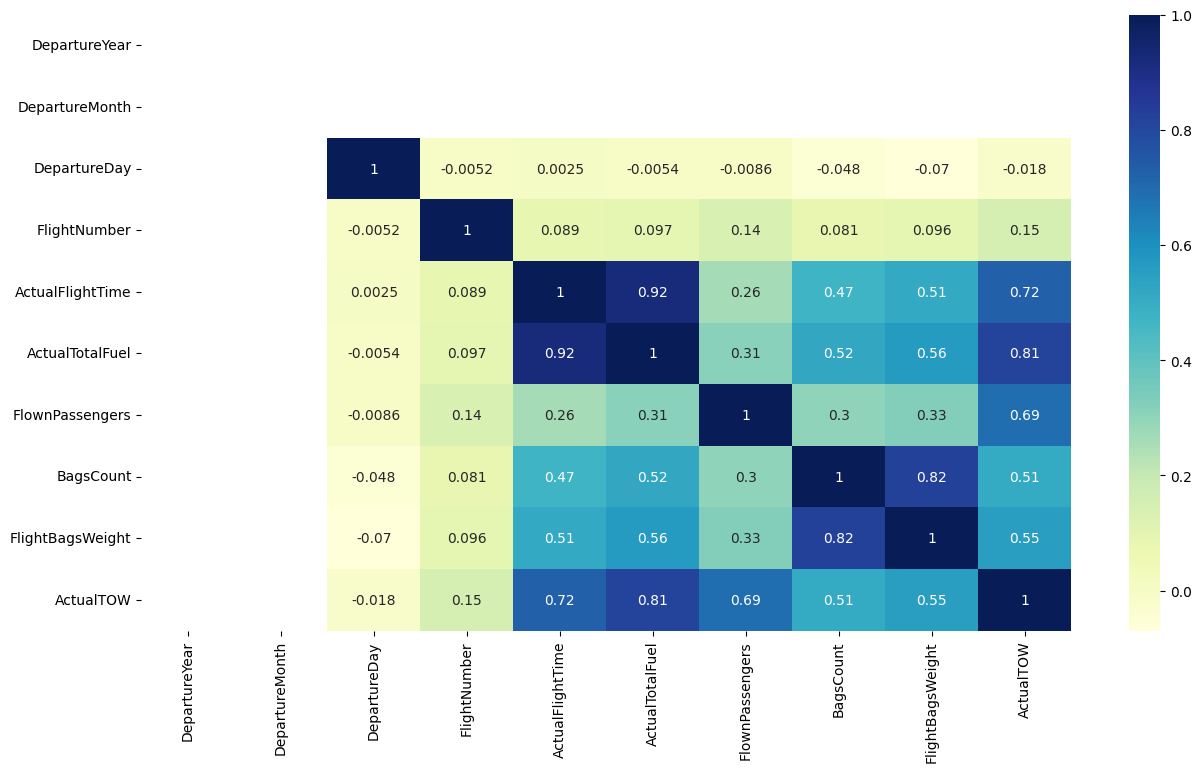

In [658]:
train_data_numeric = train_data.select_dtypes(include=['number'])
plt.figure(figsize=(15,8))
sns.heatmap(train_data_numeric.corr(), annot=True, cmap='YlGnBu')

In [659]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
train_data[['FlownPassengers', 'ActualTotalFuel', 'ActualFlightTime', 'FlightBagsWeight']] = pt.fit_transform(train_data[['FlownPassengers', 'ActualTotalFuel', 'ActualFlightTime', 'FlightBagsWeight']])

array([[<Axes: title={'center': 'DepartureYear'}>,
        <Axes: title={'center': 'DepartureMonth'}>,
        <Axes: title={'center': 'DepartureDay'}>],
       [<Axes: title={'center': 'FlightNumber'}>,
        <Axes: title={'center': 'ActualFlightTime'}>,
        <Axes: title={'center': 'ActualTotalFuel'}>],
       [<Axes: title={'center': 'FlownPassengers'}>,
        <Axes: title={'center': 'BagsCount'}>,
        <Axes: title={'center': 'FlightBagsWeight'}>],
       [<Axes: title={'center': 'ActualTOW'}>, <Axes: >, <Axes: >]],
      dtype=object)

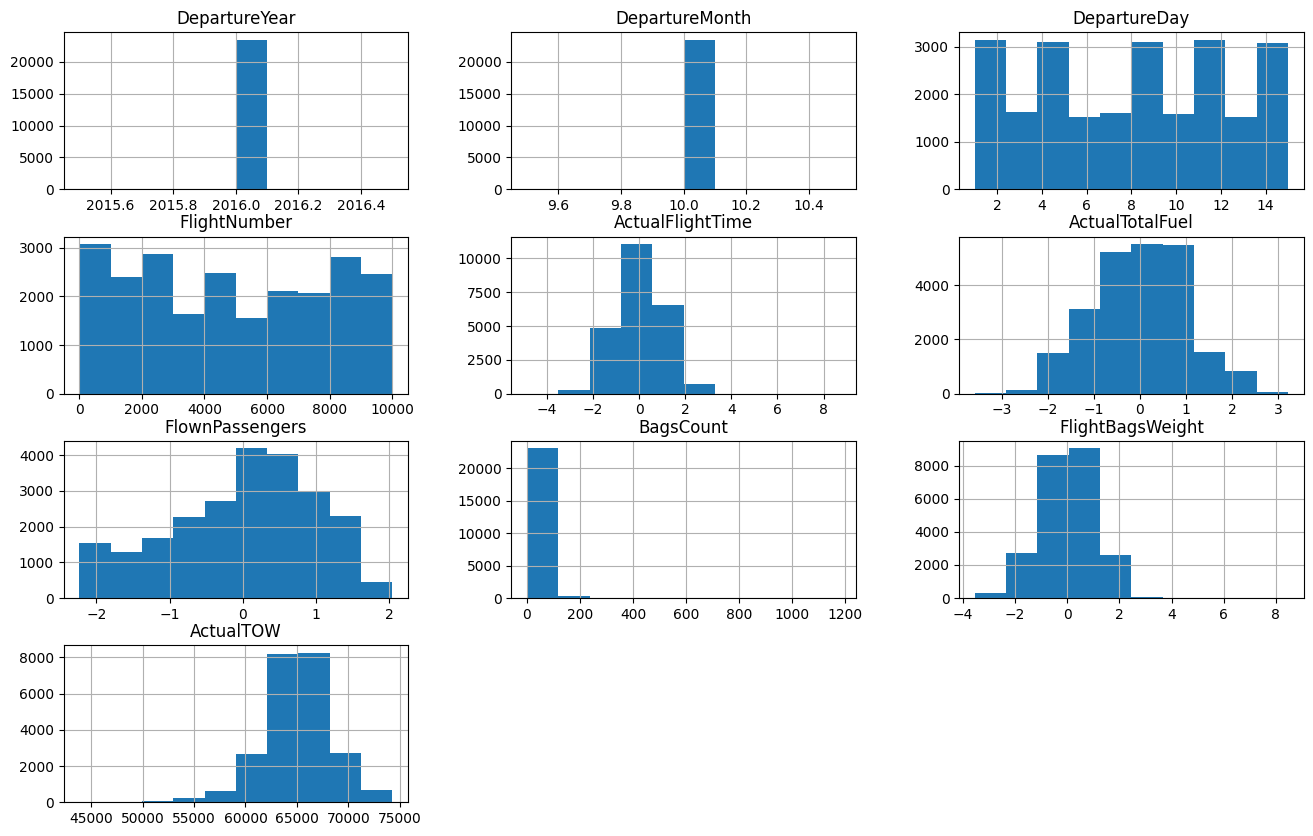

In [660]:
train_data.hist(figsize=(16, 10))

In [661]:
from  sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['DepartureAirport'] = le.fit_transform(train_data['DepartureAirport'])
train_data['ArrivalAirport'] = le.fit_transform(train_data['ArrivalAirport'])

<Axes: >

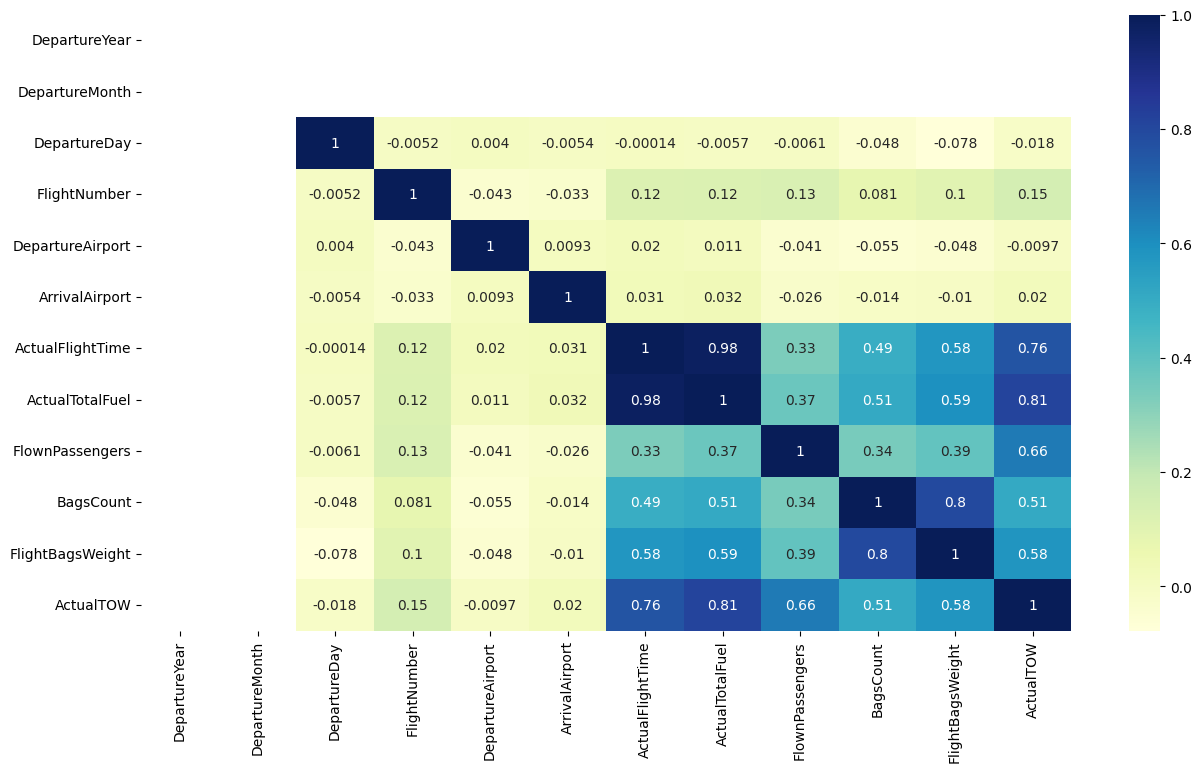

In [662]:
train_data_numeric = train_data.select_dtypes(include=['number'])
plt.figure(figsize=(15,8))
sns.heatmap(train_data_numeric.corr(), annot=True, cmap='YlGnBu')

In [663]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder


def preprocess(X):
  data = X.join(y)
  pt = PowerTransformer(method='yeo-johnson')
  data[['FlownPassengers', 'ActualTotalFuel', 'ActualFlightTime', 'FlightBagsWeight']] = pt.fit_transform(data[['FlownPassengers', 'ActualTotalFuel', 'ActualFlightTime', 'FlightBagsWeight']])

  data = data.drop(['Route','DepartureDay', 'DepartureMonth', 'DepartureYear', 'DepartureDate'], axis = 1)

  data['DepartureAirport'] = le.fit_transform(data['DepartureAirport'])
  data['ArrivalAirport'] = le.fit_transform(data['ArrivalAirport'])

  X = data.drop('ActualTOW', axis = 1)
  return X

In [664]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = train_data.drop(['Route', 'DepartureDay', 'DepartureMonth', 'DepartureYear', 'DepartureDate', 'ActualTOW'], axis = 1)
X_train = sc.fit_transform(X_train)

y_train = train_data['ActualTOW']

In [666]:
X_test = preprocess(X_test)
X_test = sc.transform(X_test)

In [667]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [668]:
lm.score(X_test, y_test)

0.822565799578617

In [669]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [90, 100, 120],
    'max_features': [2, 4, 6],
}

forest = RandomForestRegressor()

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

In [670]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 100}

In [671]:
forest = RandomForestRegressor(n_estimators=100, max_features=4)
forest.fit(X_train, y_train)

RandomForestRegressor(max_features=4)

In [672]:
forest.score(X_test, y_test)

0.9157200893117652

In [673]:
from sklearn.preprocessing import StandardScaler

sc_y = StandardScaler()
y_train_SVR = sc_y.fit_transform(y_train.values.reshape(len(y_train), 1))

In [674]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train_SVR)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [686]:
regressor.score(X_test, sc_y.transform(y_test.values.reshape(len(y_test), 1)))

0.8937521018424558

In [676]:
df_val = pd.read_csv('validation.csv', delimiter="\t")
df_val.head()

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,FLownPassengers,BagsCount,FlightBagsWeight
0,01/11/2016,2016,11,1,6003,MRS,BES,MRS-BES,84,3630,185,43,560
1,01/11/2016,2016,11,1,6004,BES,MRS,BES-MRS,86,3690,188,(null),(null)
2,01/11/2016,2016,11,1,6542,MRS,STN,MRS-STN,100,4390,168,55,720
3,01/11/2016,2016,11,1,6541,STN,MRS,STN-MRS,100,4690,185,35,460
4,01/11/2016,2016,11,1,5542,STN,REU,STN-REU,112,4900,167,31,400


In [677]:
df_val = df_val.rename({"FLownPassengers" : "FlownPassengers"}, axis = 1)
df_val['BagsCount'] = df_val['BagsCount'].replace('(null)', np.nan)
df_val['FlightBagsWeight'] = df_val['FlightBagsWeight'].replace('(null)', np.nan)
df_val['FlownPassengers'] = df_val['FlownPassengers'].replace('(null)', np.nan)

df_val = df_val.astype({'BagsCount' : 'float', 'FlightBagsWeight' : 'float', 'FlownPassengers' : 'float'})

imp = SimpleImputer(missing_values=np.nan, strategy='median')
df_val[['BagsCount', 'FlownPassengers']] = imp.fit_transform(df_val[['BagsCount', 'FlownPassengers']])
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_val['FlightBagsWeight'] = imp.fit_transform(df_val[['FlightBagsWeight']])

In [678]:
X_val = preprocess(df_val)

In [679]:
X_val_s = sc.transform(X_val)

In [680]:
y_val = forest.predict(X_val_s)

In [681]:
y_val = pd.DataFrame({"ActualTOW":y_val})

In [682]:
df_val["ActualTOW"] = y_val

In [683]:
df_val

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,FlownPassengers,BagsCount,FlightBagsWeight,ActualTOW
0,01/11/2016,2016,11,1,6003,MRS,BES,MRS-BES,84,3630,185.0,43.0,560.000000,65188.40
1,01/11/2016,2016,11,1,6004,BES,MRS,BES-MRS,86,3690,188.0,31.0,446.149087,65224.98
2,01/11/2016,2016,11,1,6542,MRS,STN,MRS-STN,100,4390,168.0,55.0,720.000000,65487.49
3,01/11/2016,2016,11,1,6541,STN,MRS,STN-MRS,100,4690,185.0,35.0,460.000000,67596.16
4,01/11/2016,2016,11,1,5542,STN,REU,STN-REU,112,4900,167.0,31.0,400.000000,65487.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873,01/11/2016,2016,11,1,2062,PMI,MAD,PMI-MAD,60,2775,173.0,12.0,160.000000,63320.60
1874,01/11/2016,2016,11,1,6423,BLQ,VLC,BLQ-VLC,99,4120,183.0,21.0,270.000000,65351.56
1875,01/11/2016,2016,11,1,6422,VLC,BLQ,VLC-BLQ,104,4230,182.0,31.0,400.000000,65134.56
1876,01/11/2016,2016,11,1,4316,BRI,BLQ,BRI-BLQ,59,2671,169.0,10.0,130.000000,62563.99


In [ ]:
df_val.to_csv('validation_predicted.csv', index=False)